## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/home/z/projects/draculab


In [2]:
# This is the name of the file where logging will happen
log_file = "/home/z/projects/draculab/logs/ei_net_log.txt"

In [3]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [4]:
# Write the output of the cell above in the simulation log
with open(log_file, 'a') as f:
    f.write(capt.stdout)
    f.close()

In [2]:
# Runner configuration
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Testing exp_dist_sig with partial connectivity.")
ei_runner.set_param('e_geom', 'rows', 10)
ei_runner.set_param('e_geom', 'columns', 10)
ei_runner.set_param('i_geom', 'rows', 10)
ei_runner.set_param('i_geom', 'columns', 10)
#----------------------------------
#ei_runner.annotate("This is so the input at each presentation changes.")
#ei_runner.set_param('n_units', 'inp', 3) # 3 input units
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist synapses.')
ei_runner.set_param('ee_syn', 'lrate', 0.9)
ei_runner.set_param('ee_syn', 'wshift', 5.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------
""" 
ei_runner.annotate("Using exp_dist_sig units.")
ei_runner.set_param('unit_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('syn', 'type', synapse_types.static)
ei_runner.set_param('unit_pars', 'tau_scale', 0.1)
ei_runner.set_param('unit_pars', 'c', 4.)
ei_runner.set_param('unit_pars', 'Kp', .1)
"""
#----------------------------------
ei_runner.annotate('This network has heterogeneous units.')
num_units = ei_runner.e_geom['rows']*ei_runner.e_geom['columns']
ei_runner.set_param('e_pars', 'slope', 0.5 + 3.*np.random.random(num_units))
ei_runner.set_param('e_pars', 'thresh', -0.2 + 0.6*np.random.random(num_units))
ei_runner.set_param('e_pars', 'tau', 0.01 + 0.04*np.random.random(num_units))

ei_runner.set_param('n', 'w_track', 16)

ei_runner.build()

In [ ]:
# Simulating
n_pres = 5
inp_time = 1.
inp_amp = 0.
pres_time = 1.
ei_runner.run(n_pres, inp_time, inp_amp, pres_time, alpha=0.5)

Presentation 0 lasted 14.549241781234741 seconds.
Presentation 1 lasted 11.85411810874939 seconds.
Presentation 2 lasted 11.953271627426147 seconds.


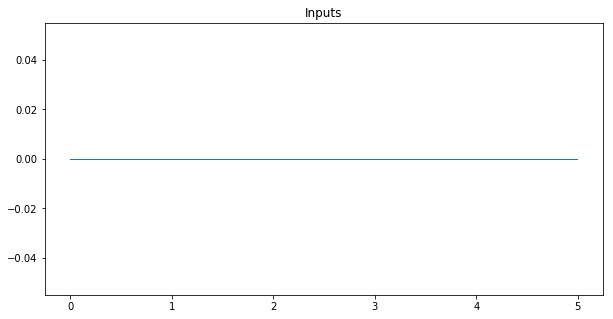

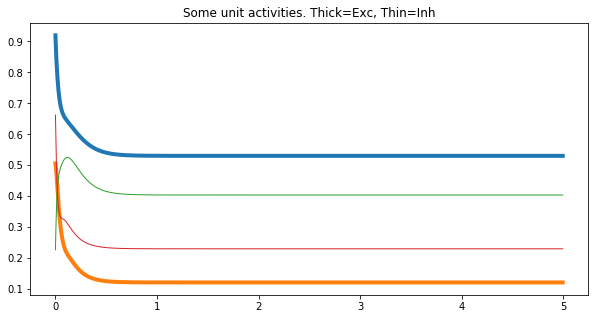

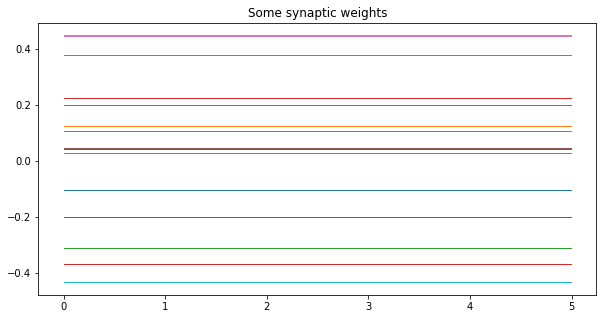

In [6]:
%matplotlib inline
ei_runner.basic_plot()

In [ ]:
ei_runner.double_anim(ei_runner.e, slider=True, interv=20, nbins=20, pdf=True)

[24 18 74 73 45 15 92 97 23 85]


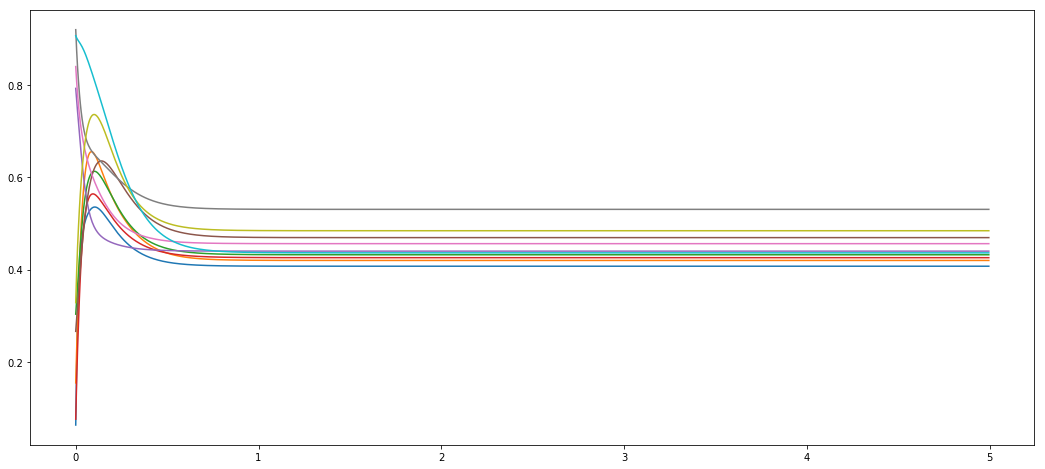

In [4]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 10  # how many units to plot
top_pop = ei_runner.e  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_units].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

[21 99 88 80 76 67 62  7 57  9 52 11  1 40 32  0 91 64 77 30 87 89 38 78 31
 29 42 82 59 96]


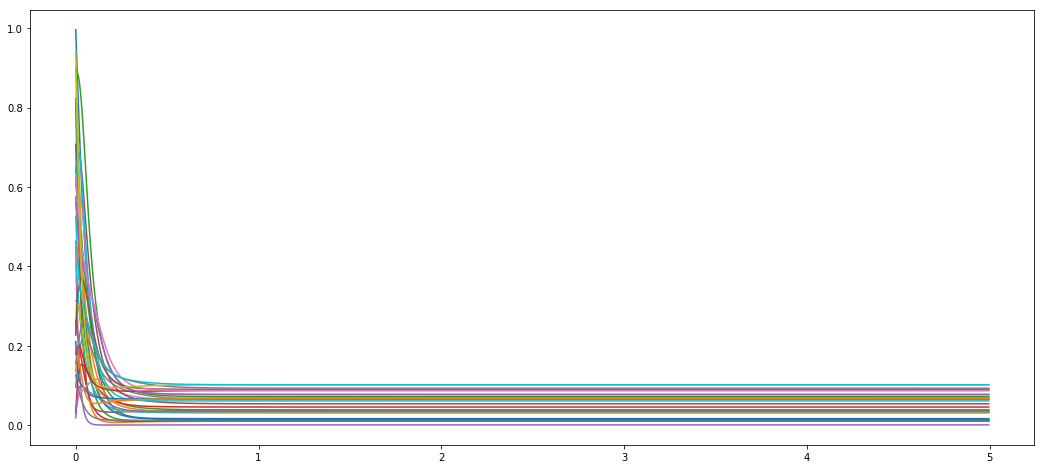

In [5]:
# Plot the lowest excitatory unit activities
n_bottom = 30  # how many units to plot
bottom_pop = ei_runner.e  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_units].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [12]:
# Annotations and log
ei_runner.annotate('This simulation shows that exp_dist_sig units can actually perform well for positive c when', make_history=False)
ei_runner.annotate('the connectivity is partial.', make_history=False)
ei_runner.log()

In [13]:
ei_runner.history

['__init__ at Wed Dec 20 12:05:07 2017',
 'np.random.seed = 19680801',
 '#Testing exp_dist_sig with partial connectivity.',
 "geom['rows'] = 15",
 "geom['columns'] = 15",
 "conn['mask'] = {'circular': {'radius': 0.3}}",
 "conn['kernel'] = 0.9",
 "conn['edge_wrap'] = True",
 '#Using exp_rate_dist synapses.',
 "syn['lrate'] = 0.9",
 "syn['wshift'] = 5.0",
 "syn['c'] = 2.0",
 '#This network has heterogeneous units.',
 "unit_pars['slope'] = [ 2.22933901  3.3859767   1.64130351  3.4249308   1.58011216  1.99325196\n  1.75750518  1.19506705  0.78320081  1.97150903  2.30434662  3.07332363\n  1.75798577  0.89528029  0.70432045  1.23044902  1.39653242  2.36879591\n  1.32714947  0.64969695  2.72292219  1.80197381  1.37539825  1.33566853\n  2.59896768  2.26791049  3.45403186  1.31700295  3.4058757   2.60149923\n  3.09108936  3.10105206  2.04371656  1.38321327  3.22305296  2.21274576\n  2.38713509  3.27091269  1.08869434  3.30387699  2.99255743  1.763335\n  2.99462746  1.77480916  1.15994208  3.447

In [3]:
ei_runner.conn_anim(ei_runner.e, ei_runner.e, slider=True, weights=False)

interactive(children=(IntSlider(value=50, description='frame', min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

In [8]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

interactive(children=(IntSlider(value=50, description='frame', min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

In [4]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

interactive(children=(IntSlider(value=50, description='frame', min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [22]:
np.random.rand()

0.30138553562335546